## Predicting Future Onset of Diabetes

This project aims to showcase the process of developing a Python-based model that predicts the likelihood of diabetes in patients with the condition.
<br>
The following stages will be covered:

1) <b>Data exploration:</b> to gain insights into the available data.<br>
2) <b>Feature engineering:</b> to create new relevant features.<br>
3) <b>Building training, validation, and test datasets</b> for the model.<br>
4) Selecting the most <b>appropriate model</b> for the task.<br>
5) <b>Evaluating the model's performance:</b> to determine its accuracy in predicting diabetes.

### Project Definition

The goal of this project is to create a predictive model that can determine whether or not a patient has diabetes.

### 1) Data Exploration

The data used in this project is sourced from the Pima Indians Diabetes Database, which is available on Kaggle at https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database.

In [1]:
# Importing libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import pickle

%matplotlib inline

In [2]:
%cd /Users/vishesh/Documents/Major-Project-Deployment

/Users/vishesh/Documents/Major-Project-Deployment


In [3]:
## reading the data
df_diab = pd.read_csv('sugar_diabetes.csv')
df_diab

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [4]:
df_diab.head()

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1

In [5]:
df_diab.shape

(768, 9)

In [6]:
df_diab.describe()

Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  0.078000   21.000000    0.000000  
25%     27.300000                  0.243750   24.000000    0.000000  
50%     32.000000                  0.372500   29.000000    0.000000  
75%     36.600000                  0.626250   41.000000    1.000000  
max     67.100000                  2.420000   81.000000    1.000000

In [7]:
df_diab.describe().T

count        mean         std     min       25%  \
Pregnancies               768.0    3.845052    3.369578   0.000   1.00000   
Glucose                   768.0  120.894531   31.972618   0.000  99.00000   
BloodPressure             768.0   69.105469   19.355807   0.000  62.00000   
SkinThickness             768.0   20.536458   15.952218   0.000   0.00000   
Insulin                   768.0   79.799479  115.244002   0.000   0.00000   
BMI                       768.0   31.992578    7.884160   0.000  27.30000   
DiabetesPedigreeFunction  768.0    0.471876    0.331329   0.078   0.24375   
Age                       768.0   33.240885   11.760232  21.000  24.00000   
Outcome                   768.0    0.348958    0.476951   0.000   0.00000   

                               50%        75%     max  
Pregnancies                 3.0000    6.00000   17.00  
Glucose                   117.0000  140.25000  199.00  
BloodPressure              72.0000   80.00000  122.00  
SkinThickness              23.0000   32.00000   99.00  
Insulin                    30.5000  127.25000  846.00  
BMI                        32.0000   36.60000   67.10  
DiabetesPedigreeFunction    0.3725    0.62625    2.42  
Age                        29.0000   41.00000   81.00  
Outcome                     0.0000    1.00000    1.00

In [8]:
df_diab.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df_diab.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

In [10]:
## Checking the null values in each column of the dataframe

for col in df_diab.columns:
    num_missing = df_diab[col].isnull().sum()
    print(f"Number of missing values in {col}: {num_missing}")

Number of missing values in Pregnancies: 0
Number of missing values in Glucose: 0
Number of missing values in BloodPressure: 0
Number of missing values in SkinThickness: 0
Number of missing values in Insulin: 0
Number of missing values in BMI: 0
Number of missing values in DiabetesPedigreeFunction: 0
Number of missing values in Age: 0
Number of missing values in Outcome: 0


In [11]:
## Checking the distribution count of target variable
df_diab["Outcome"].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

The output suggests that there is an imbalance in the distribution of the target variable "Outcome", as the number of records with absence of diabetes (class "0") is significantly higher than the records with presence of diabetes (class "1"). This indicates that the dataset is imbalanced and may require sampling techniques to address the imbalance, such as oversampling the minority class or undersampling the majority class. Without proper handling of the imbalance, the predictive model may be biased towards the majority class and result in lower accuracy for predicting the minority class.

In [12]:
# Percentage of distribution of the Outcome variable was examined.
df_diab["Outcome"].value_counts()*100/len(df_diab)

0    65.104167
1    34.895833
Name: Outcome, dtype: float64

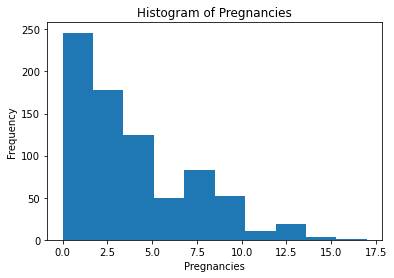

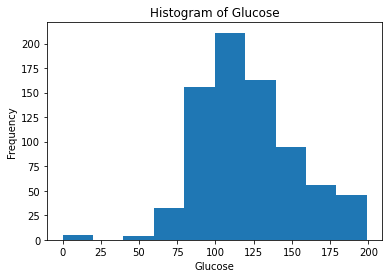

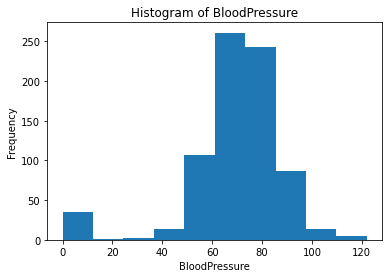

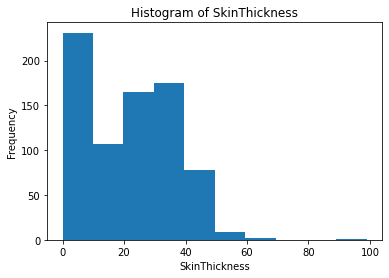

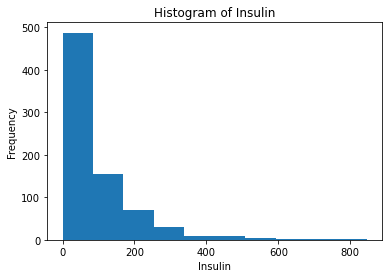

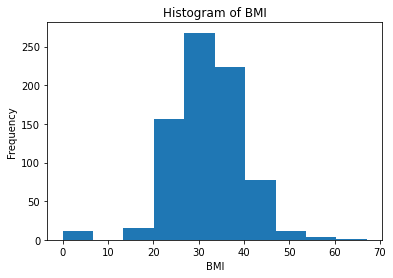

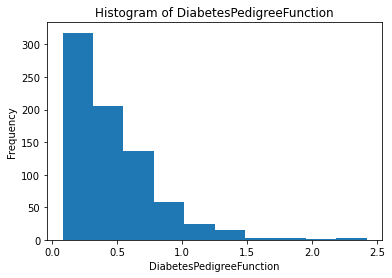

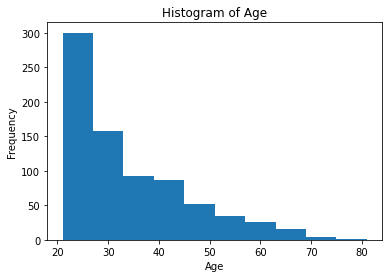

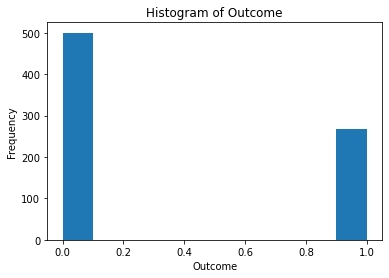

In [13]:
# visualize the distribution of each variable in a dataframe

import matplotlib.pyplot as plt

for col in df_diab.columns:
    plt.hist(df_diab[col])
    plt.title(f"Histogram of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()

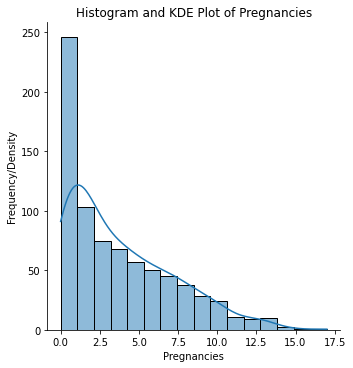

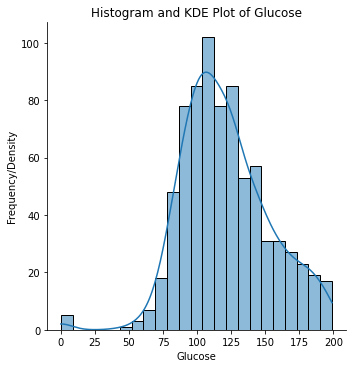

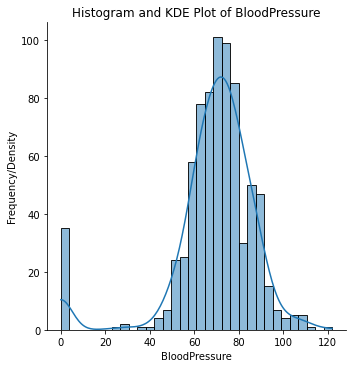

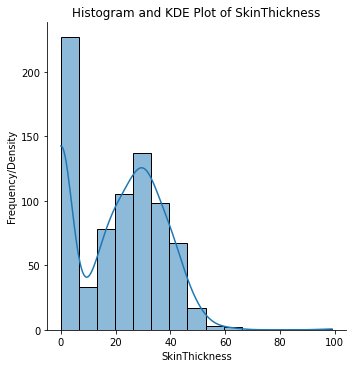

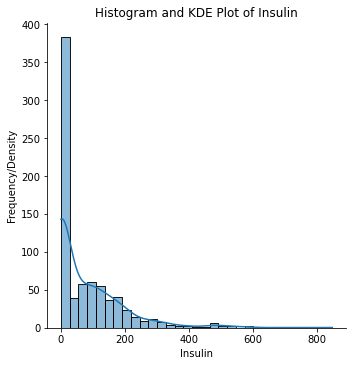

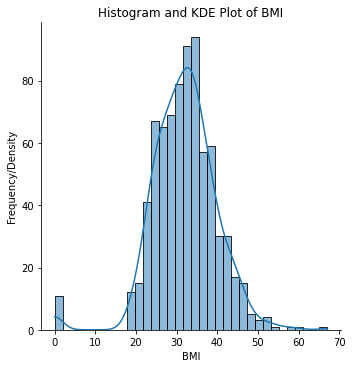

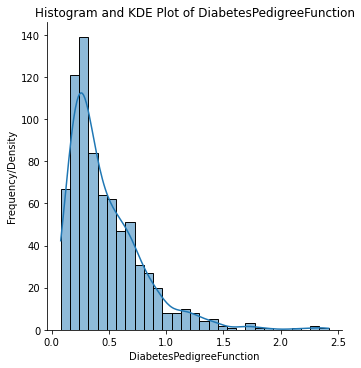

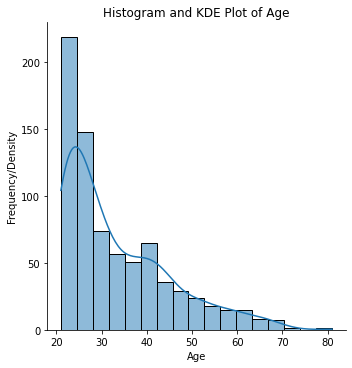

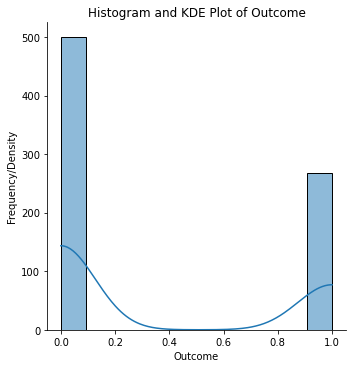

In [14]:
## Displaying the density of the data
import seaborn as sns

for col in df_diab.columns:
    sns.displot(df_diab[col], kde=True)
    plt.title(f"Histogram and KDE Plot of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency/Density")
    plt.show()

## Observations
<br>
<br>

-The dataset includes a total of 768 records and 9 features.<br>
-Each feature is a numerical value represented as an integer or floating-point number.<br>
-Some features (e.g., Glucose, Blood pressure, Insulin, BMI) contain missing data, which is represented as a zero value.<br>
-There are no NaN values in the dataset.<br>
-The outcome column has two possible values: 1 indicates a positive diagnosis for diabetes, while 0 indicates a negative diagnosis.<br>

In [15]:
for col in df_diab.columns:
    if 0 in df_diab[col].values:
        print(f"Number of 0's in {col}: {df_diab[col].value_counts()[0]}")
    else:
        print(f"Column {col} does not contain the value 0")

Number of 0's in Pregnancies: 111
Number of 0's in Glucose: 5
Number of 0's in BloodPressure: 35
Number of 0's in SkinThickness: 227
Number of 0's in Insulin: 374
Number of 0's in BMI: 11
Column DiabetesPedigreeFunction does not contain the value 0
Column Age does not contain the value 0
Number of 0's in Outcome: 500


In [16]:
df_diab.iloc[50:100]

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
50            1      103             80             11       82  19.4   
51            1      101             50             15       36  24.2   
52            5       88             66             21       23  24.4   
53            8      176             90             34      300  33.7   
54            7      150             66             42      342  34.7   
55            1       73             50             10        0  23.0   
56            7      187             68             39      304  37.7   
57            0      100             88             60      110  46.8   
58            0      146             82              0        0  40.5   
59            0      105             64             41      142  41.5   
60            2       84              0              0        0   0.0   
61            8      133             72              0        0  32.9   
62            5       44             62              0        0  25.0   
63            2      141             58             34      128  25.4   
64            7      114             66              0        0  32.8   
65            5       99             74             27        0  29.0   
66            0      109             88             30        0  32.5   
67            2      109             92              0        0  42.7   
68            1       95             66             13       38  19.6   
69            4      146             85             27      100  28.9   
70            2      100             66             20       90  32.9   
71            5      139             64             35      140  28.6   
72           13      126             90              0        0  43.4   
73            4      129             86             20      270  35.1   
74            1       79             75             30        0  32.0   
75            1        0             48             20        0  24.7   
76            7       62             78              0        0  32.6   
77            5       95             72             33        0  37.7   
78            0      131              0              0        0  43.2   
79            2      112             66             22        0  25.0   
80            3      113             44             13        0  22.4   
81            2       74              0              0        0   0.0   
82            7       83             78             26       71  29.3   
83            0      101             65             28        0  24.6   
84            5      137            108              0        0  48.8   
85            2      110             74             29      125  32.4   
86           13      106             72             54        0  36.6   
87            2      100             68             25       71  38.5   
88           15      136             70             32      110  37.1   
89            1      107             68             19        0  26.5   
90            1       80             55              0        0  19.1   
91            4      123             80             15      176  32.0   
92            7       81             78             40       48  46.7   
93            4      134             72              0        0  23.8   
94            2      142             82             18       64  24.7   
95            6      144             72             27      228  33.9   
96            2       92             62             28        0  31.6   
97            1       71             48             18       76  20.4   
98            6       93             50             30       64  28.7   
99            1      122             90             51      220  49.7   

    DiabetesPedigreeFunction  Age  Outcome  
50                     0.491   22        0  
51                     0.526   26        0  
52                     0.342   30        0  
53                     0.467   58        1  
54                     0.718   42        0  
55        

In [17]:
## Dealing with Missing values

In [18]:
import numpy as np
import pandas as pd

df_diab[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']] = df_diab[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI', 'Age']].replace(0, np.nan)


In [19]:
df_diab.isnull().sum()

Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                       0
dtype: int64

In [20]:
df_diab['Pregnancies'] = df_diab['Pregnancies'].fillna(0)

<b>The glucose column has a Gaussian distribution, then we can replace the missing values with the mean or median of the column. If the column has outliers, then we should consider using median instead of mean.</b>

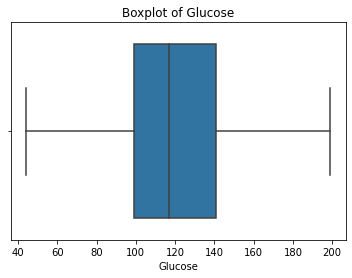

In [21]:
## checking for glucose column outliers

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_diab['Glucose'])
plt.title("Boxplot of Glucose")
plt.xlabel("Glucose")
plt.show()


In [22]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy='mean')
df_diab['Glucose'] = imputer.fit_transform(df_diab[['Glucose']])
df_diab['BloodPressure'] = imputer.fit_transform(df_diab[['BloodPressure']])


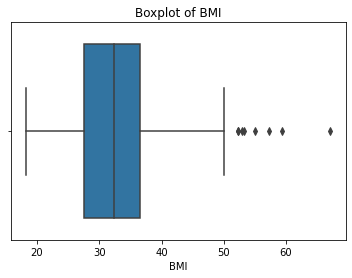

In [23]:
## checking for BMI column outliers

import matplotlib.pyplot as plt
import seaborn as sns

sns.boxplot(x=df_diab['BMI'])
plt.title("Boxplot of BMI")
plt.xlabel("BMI")
plt.show()

In [24]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='median')

# Fit and transform the imputer on the SkinThickness column
df_diab['SkinThickness'] = imputer.fit_transform(df_diab[['SkinThickness']])
df_diab['Insulin'] = imputer.fit_transform(df_diab[['Insulin']])
df_diab['BMI'] = imputer.fit_transform(df_diab[['BMI']])


In [25]:
df_diab.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

# Data Insights

<AxesSubplot:xlabel='Outcome', ylabel='count'>

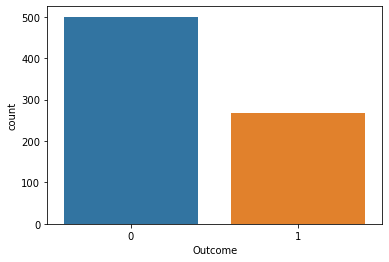

In [26]:
# Outcome countplot
sns.countplot(x = 'Outcome',data = df_diab)

In [27]:
df_diab

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    125.0  33.6   
1            1.0     85.0           66.0           29.0    125.0  26.6   
2            8.0    183.0           64.0           29.0    125.0  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9   
764          2.0    122.0           70.0           27.0    125.0  36.8   
765          5.0    121.0           72.0           23.0    112.0  26.2   
766          1.0    126.0           60.0           29.0    125.0  30.1   
767          1.0     93.0           70.0           31.0    125.0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

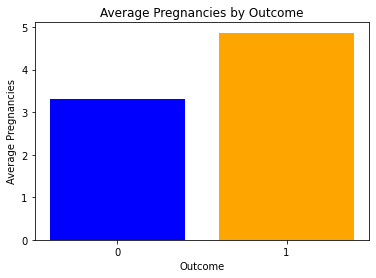

In [28]:
temp_preg = df_diab.groupby('Outcome')['Pregnancies'].mean()

plt.bar(temp_preg.index, temp_preg.values, color = ['Blue', 'orange'])
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Average Pregnancies')
plt.title('Average Pregnancies by Outcome')
plt.show()

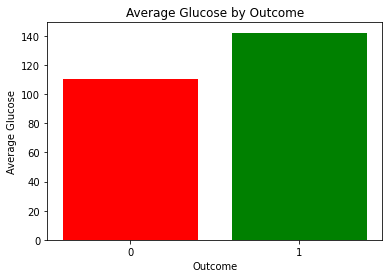

In [29]:
temp_preg = df_diab.groupby('Outcome')['Glucose'].mean()

plt.bar(temp_preg.index, temp_preg.values, color = ['Red', 'Green'])
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Average Glucose')
plt.title('Average Glucose by Outcome')
plt.show()

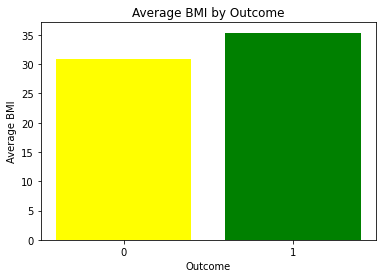

In [30]:
temp_preg = df_diab.groupby('Outcome')['BMI'].mean()

plt.bar(temp_preg.index, temp_preg.values, color = ['Yellow', 'Green'])
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Average BMI')
plt.title('Average BMI by Outcome')
plt.show()

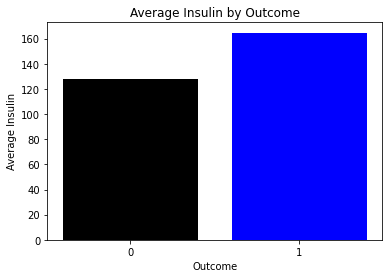

In [31]:
temp_preg = df_diab.groupby('Outcome')['Insulin'].mean()

plt.bar(temp_preg.index, temp_preg.values, color = ['black', 'blue'])
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Average Insulin')
plt.title('Average Insulin by Outcome')
plt.show()

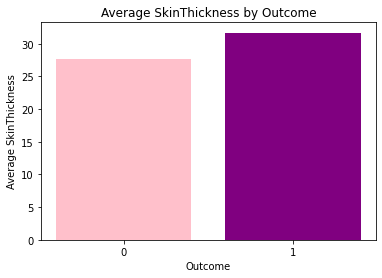

In [32]:
temp_preg = df_diab.groupby('Outcome')['SkinThickness'].mean()

plt.bar(temp_preg.index, temp_preg.values, color = ['pink', 'purple'])
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Average SkinThickness')
plt.title('Average SkinThickness by Outcome')
plt.show()

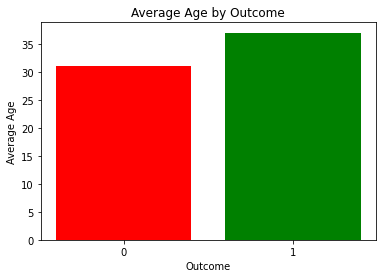

In [33]:
temp_preg = df_diab.groupby('Outcome')['Age'].mean()

plt.bar(temp_preg.index, temp_preg.values, color = ['red', 'Green'])
plt.xticks([0,1])
plt.xlabel('Outcome')
plt.ylabel('Average Age')
plt.title('Average Age by Outcome')
plt.show()

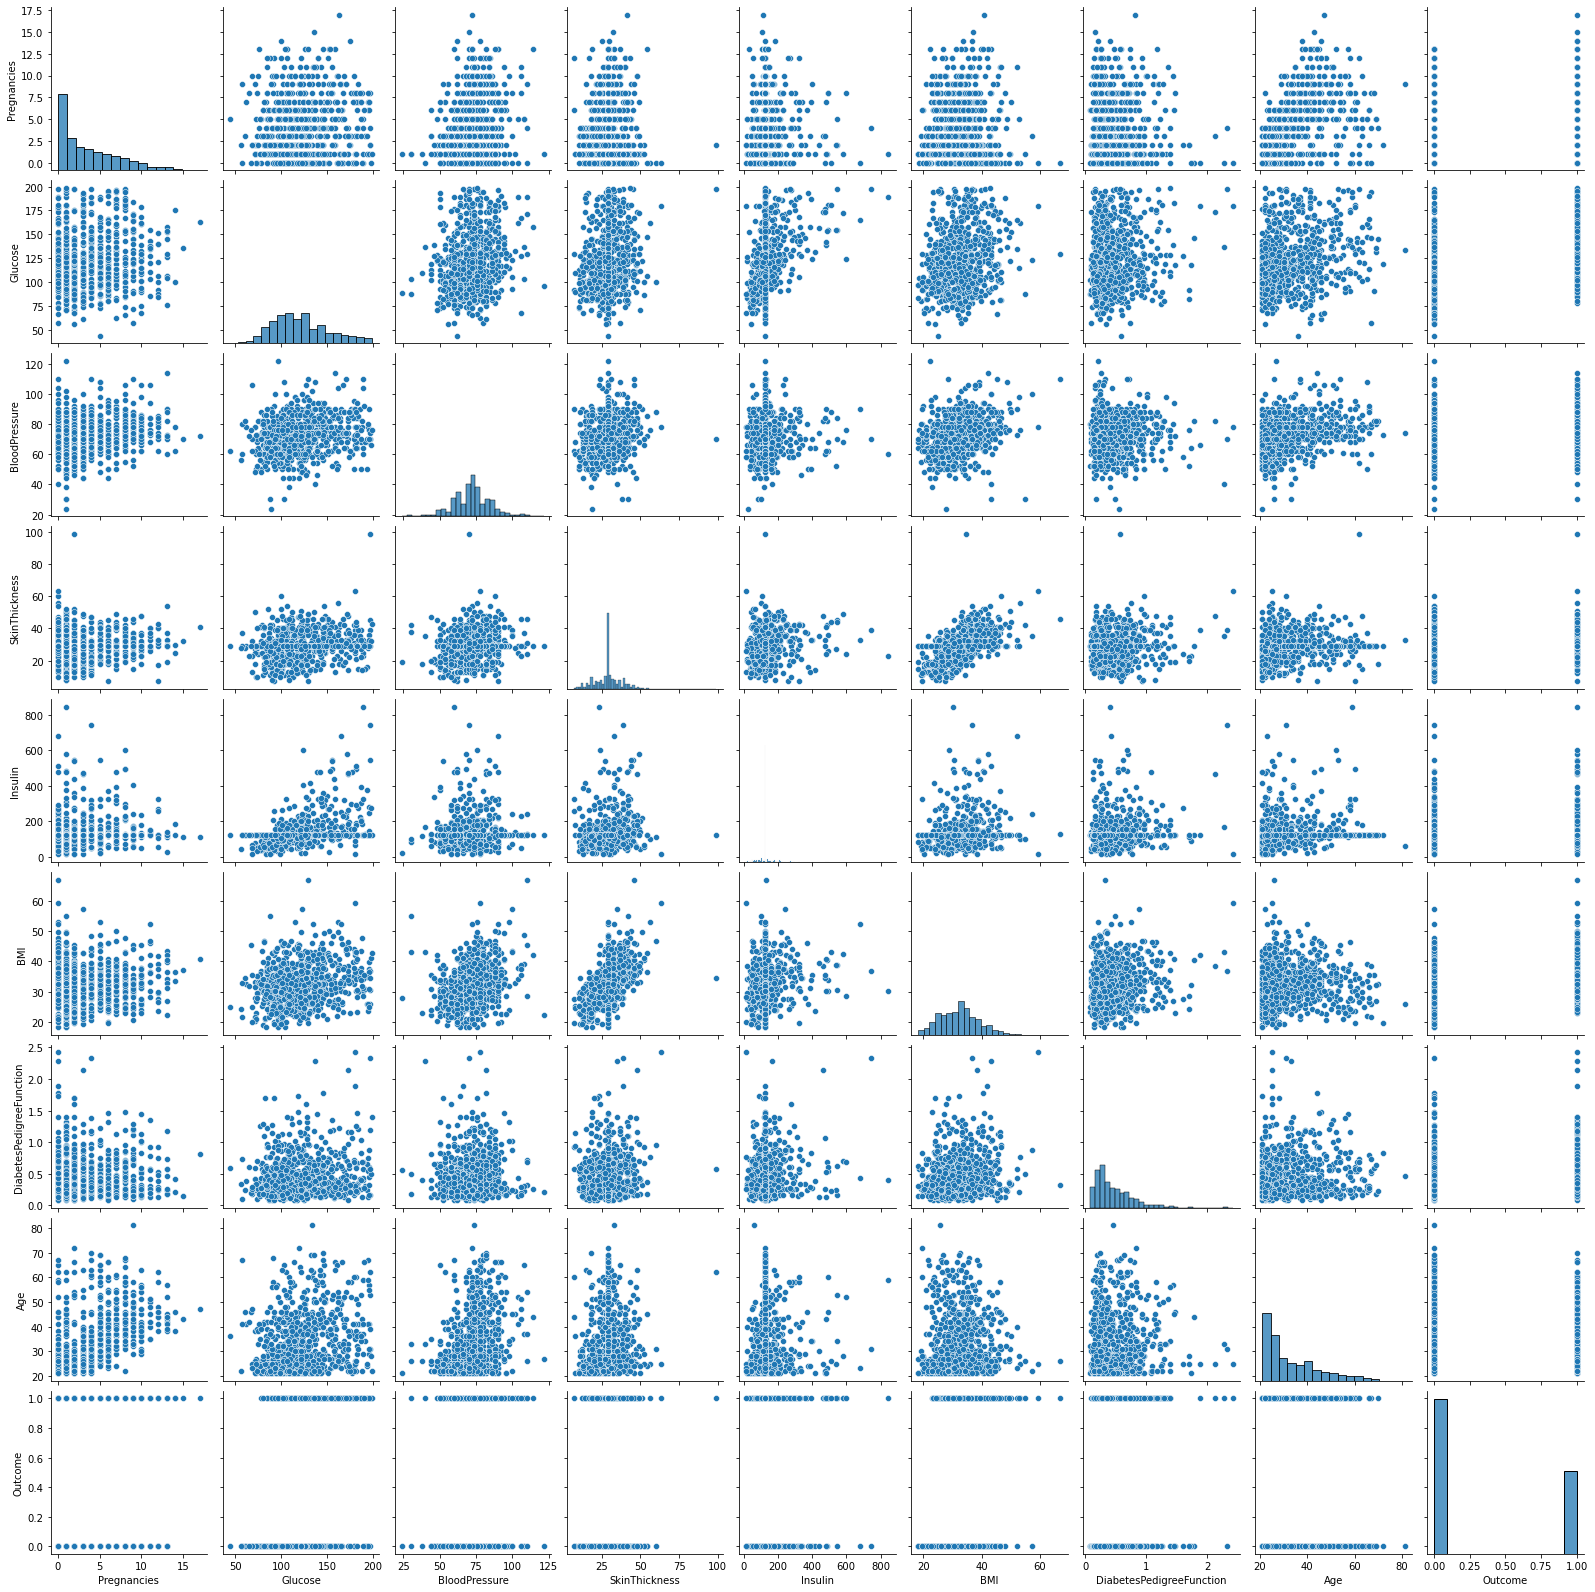

In [34]:
# Pairplot without hue
import seaborn as sns
sns.pairplot(data = df_diab)
plt.show()

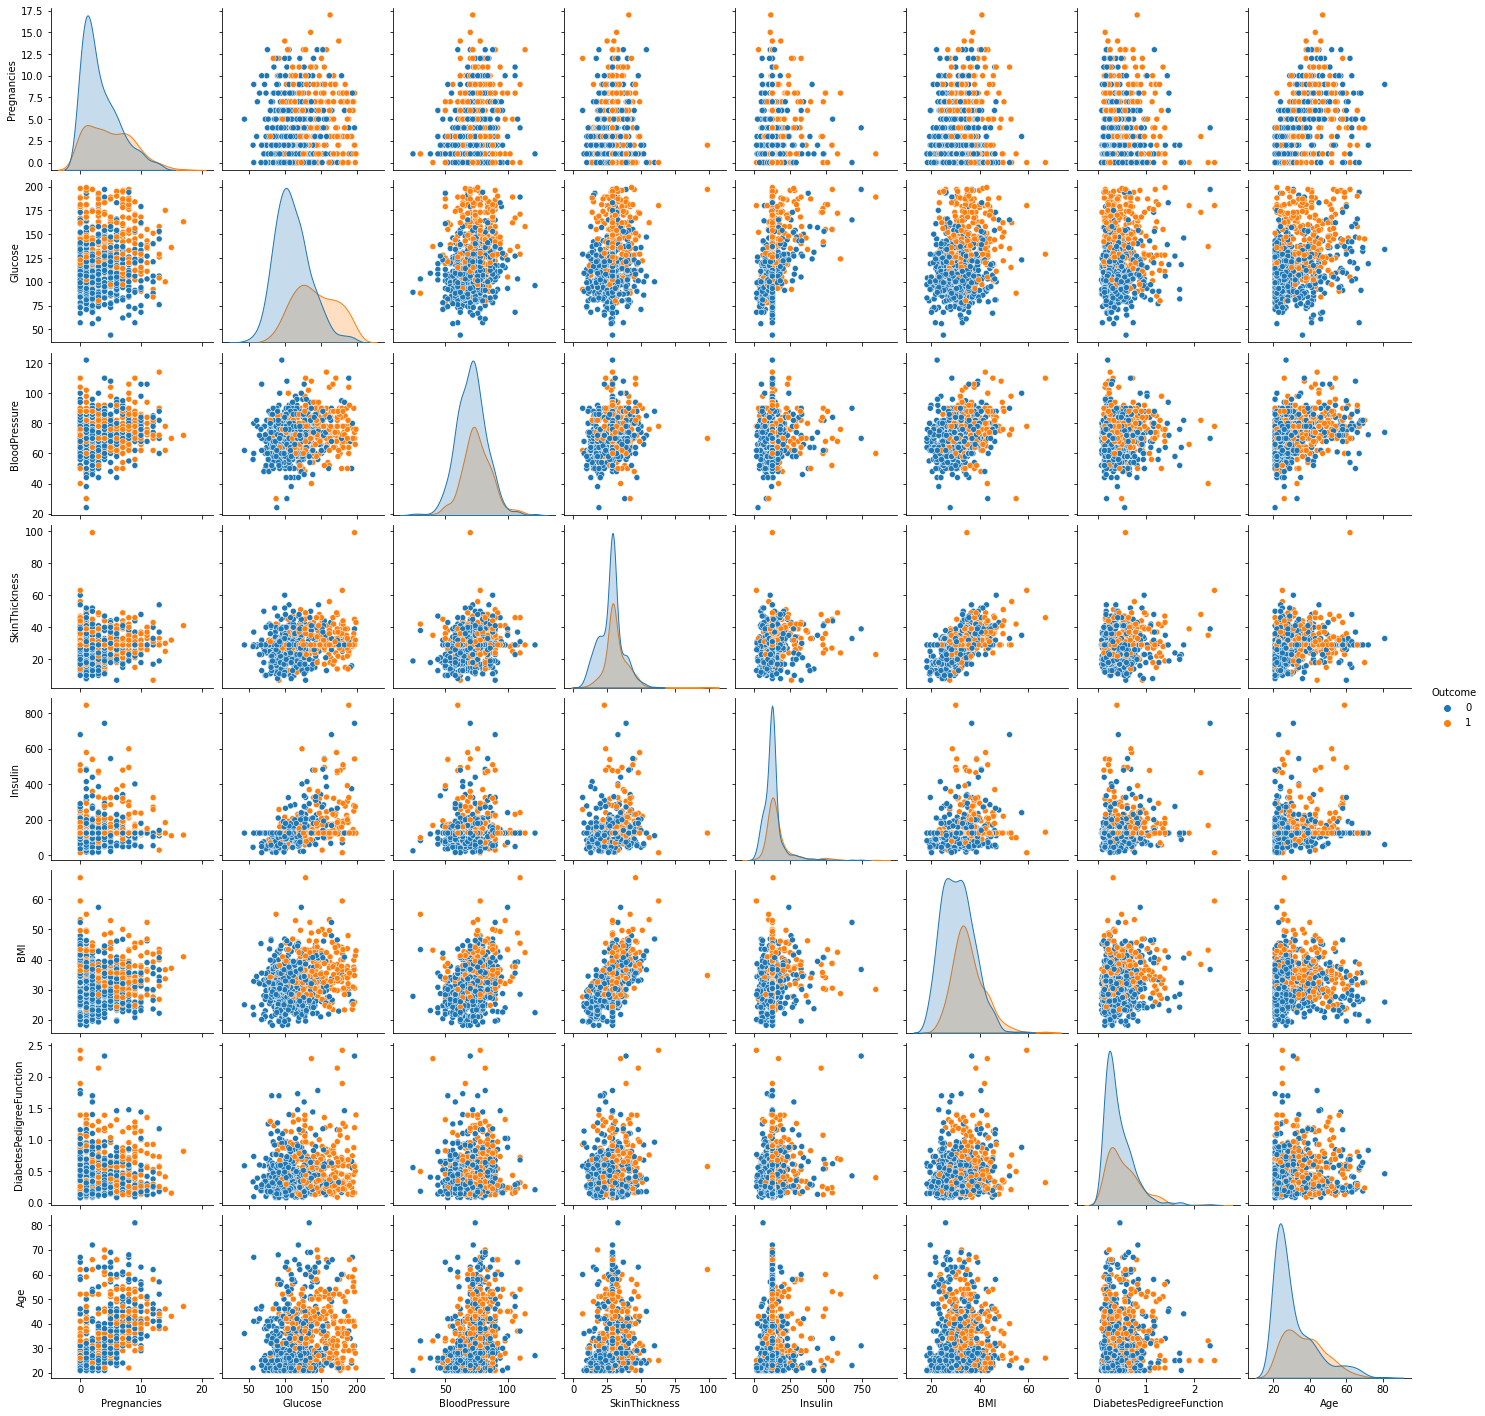

In [35]:
# Pairplot with hue
import seaborn as sns
sns.pairplot(data = df_diab, hue = 'Outcome')
plt.show()

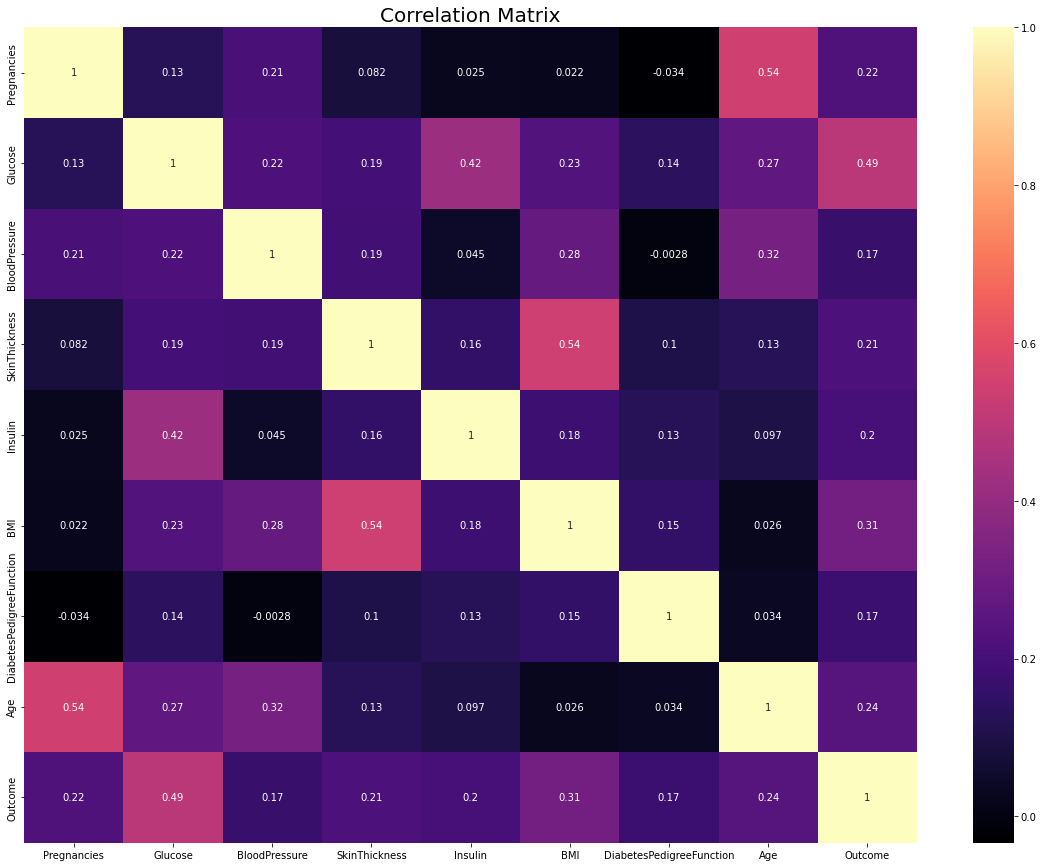

In [36]:
# Correlation matrix graph of the data set
plt.figure(figsize= [20,15])
ax = sns.heatmap(df_diab.corr(), annot=True, cmap = "magma" )
ax.set_title("Correlation Matrix", fontsize=20)
plt.show()

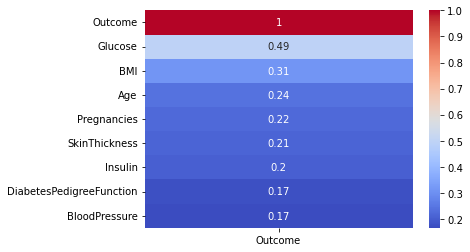

In [37]:
## performing the correlation of attributes with the target variable

import seaborn as sns
import matplotlib.pyplot as plt

corr_matrix = df_diab.corr()
sns.heatmap(corr_matrix[['Outcome']].sort_values(by='Outcome', ascending=False), cmap='coolwarm', annot=True)
plt.show()

# Data Modelling

In [38]:
## splitting data into training and testing sets 
from sklearn.model_selection import train_test_split

X = df_diab.drop("Outcome", axis=1)
y = df_diab["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, y_train.shape

((614, 8), (614,))

In [39]:
## Performing scaling to get the distribution of data in a relevant shape
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Sampling Techniques -  SMOTE

In [40]:
## performing sampling techniques to make the data balanced
from imblearn.over_sampling import SMOTE

sm = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = sm.fit_resample(X_train_scaled, y_train)

#### Applying models

In [41]:
# logistic regression model

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train_resampled, y_train_resampled)

y_train_pred = log_reg.predict(X_train_resampled)
y_test_pred = log_reg.predict(X_test_scaled)

train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
print("Training Accuracy:", train_accuracy)

test_accuracy = accuracy_score(y_test, y_test_pred)
print("Testing Accuracy:", test_accuracy)
print('\n')

print("Classification Report:")
print(classification_report(y_test, y_test_pred))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_test_pred))

Training Accuracy: 0.7605985037406484
Testing Accuracy: 0.7077922077922078


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154

Confusion Matrix:
[[70 29]
 [16 39]]


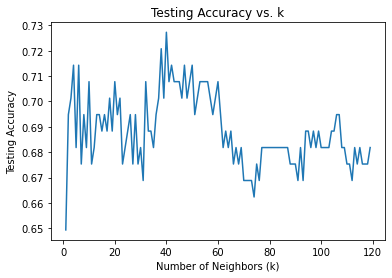

In [42]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

accuracy_val_k = []

k_val = list(range(1,120))

for k in k_val:
  knn = KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train_resampled,y_train_resampled)
  y_pred_x = knn.predict(X_test_scaled)
  accuracy = accuracy_score(y_test, y_pred_x)
  accuracy_val_k.append(accuracy)


plt.plot(k_val, accuracy_val_k)
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Testing Accuracy')
plt.title('Testing Accuracy vs. k')
plt.show()

In [43]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier

# Define the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=40)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVC", SVC(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

# Train and evaluate the performance of each model
for name, model in models:
    print("Training and evaluating:", name)
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training and testing sets
    y_train_pred = model.predict(X_train_resampled)
    y_test_pred = model.predict(X_test_scaled)

    # Evaluate the performance on the training set
    train_accuracy = accuracy_score(y_train_resampled, y_train_pred)
    print("Training Accuracy:", train_accuracy)
    print('\n')

    # Evaluate the performance on the testing set
    test_accuracy = accuracy_score(y_test, y_test_pred)
    print("Testing Accuracy:", test_accuracy)
    print('\n')
    
    # Print the classification report
    print("Classification Report:")
    print(classification_report(y_test, y_test_pred))
    print('\n')
    
    # Print the confusion matrix
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print('------------------------------------')
    print('\n')

Training and evaluating: Logistic Regression
Training Accuracy: 0.7605985037406484


Testing Accuracy: 0.7077922077922078


Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.71      0.76        99
           1       0.57      0.71      0.63        55

    accuracy                           0.71       154
   macro avg       0.69      0.71      0.70       154
weighted avg       0.73      0.71      0.71       154



Confusion Matrix:
[[70 29]
 [16 39]]
------------------------------------


Training and evaluating: knn
Training Accuracy: 0.7805486284289277


Testing Accuracy: 0.7272727272727273


Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.66      0.76        99
           1       0.58      0.85      0.69        55

    accuracy                           0.73       154
   macro avg       0.74      0.76      0.72       154
weighted avg       0.78      0.73      0.73  

Training and evaluating: Logistic Regression
Training and evaluating: knn
Training and evaluating: Decision Tree
Training and evaluating: Random Forest
Training and evaluating: SVC
Training and evaluating: Gradient Boosting
Training and evaluating: XGBoost


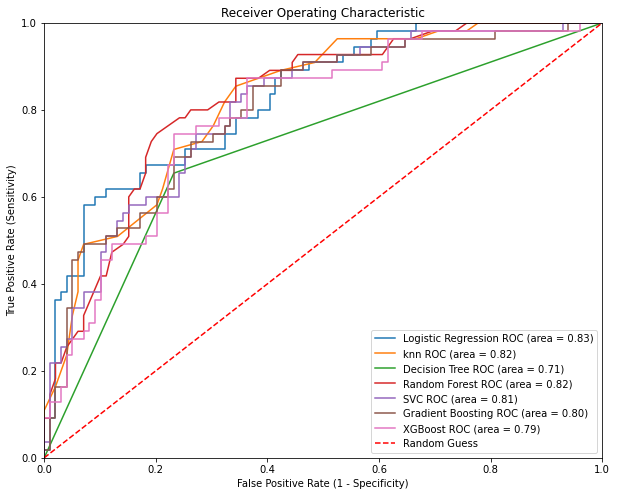

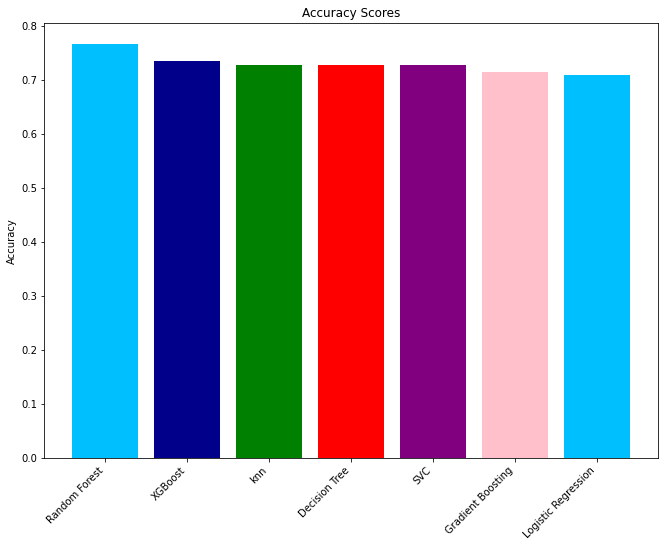

In [44]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

plt.rcParams['figure.figsize'] = [10, 8]

# Define the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42, max_iter = 1000)),
    ("knn", KNeighborsClassifier(n_neighbors=40)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("SVC", SVC(random_state=42, probability=True)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

# Train and evaluate the performance of each model
for name, model in models:
    print("Training and evaluating:", name)
    model.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training and testing sets
    y_test_pred = model.predict(X_test_scaled)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    
    # Plot ROC curve
    fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_scaled)[:,1])
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label='%s ROC (area = %0.2f)' % (name, roc_auc))
    

# Plot the ROC curves and show the graph
plt.plot([0, 1], [0, 1],'r--', label='Random Guess')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.title('Receiver Operating Characteristic')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.legend(loc="lower right")
plt.show()

# Plot the accuracy scores and show the graph
accuracy_scores = [(name, accuracy_score(y_test, model.predict(X_test_scaled))) for name, model in models]
accuracy_scores.sort(key=lambda x: x[1], reverse=True)
names = [name for name, _ in accuracy_scores]
scores = [score for _, score in accuracy_scores]
plt.figure(figsize=(11,8))
plt.bar(names, scores, color = ['deepskyblue', 'darkblue', 'green', 'red', 'purple', 'pink'])
plt.title('Accuracy Scores')
plt.ylabel('Accuracy')
plt.xticks(rotation=45, ha='right')
plt.show()

In [45]:
from sklearn.model_selection import cross_val_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=40)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

# Perform 5-fold cross-validation on each model and print the results
for name, model in models:
    print("Performing 5-fold cross-validation on", name)
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
    print("Cross-validation scores:", scores)
    print("Average cross-validation score:", scores.mean())
    print()

Performing 5-fold cross-validation on Logistic Regression
Cross-validation scores: [0.74534161 0.77018634 0.73125    0.73125    0.7625    ]
Average cross-validation score: 0.7481055900621119

Performing 5-fold cross-validation on Decision Tree
Cross-validation scores: [0.71428571 0.72049689 0.76875    0.8        0.78125   ]
Average cross-validation score: 0.7569565217391304

Performing 5-fold cross-validation on knn
Cross-validation scores: [0.76397516 0.78881988 0.7625     0.7375     0.775     ]
Average cross-validation score: 0.7655590062111801

Performing 5-fold cross-validation on Random Forest
Cross-validation scores: [0.77639752 0.80745342 0.79375    0.88125    0.8875    ]
Average cross-validation score: 0.8292701863354036

Performing 5-fold cross-validation on Gradient Boosting
Cross-validation scores: [0.7515528  0.78881988 0.80625    0.85625    0.8625    ]
Average cross-validation score: 0.8130745341614907

Performing 5-fold cross-validation on XGBoost
Cross-validation scores:

## Best Model

In [46]:
from sklearn.model_selection import cross_val_score

# Define the models
models = [
    ("Logistic Regression", LogisticRegression(random_state=42)),
    ("Decision Tree", DecisionTreeClassifier(random_state=42)),
    ("knn", KNeighborsClassifier(n_neighbors=40)),
    ("Random Forest", RandomForestClassifier(random_state=42)),
    ("Gradient Boosting", GradientBoostingClassifier(random_state=42)),
    ("XGBoost", XGBClassifier(random_state=42))
]

# Perform 5-fold cross-validation on each model and select the best model
best_model_name = ""
best_model_score = 0.0
for name, model in models:
    scores = cross_val_score(model, X_train_resampled, y_train_resampled, cv=5, scoring="accuracy")
    mean_score = scores.mean()
    if mean_score > best_model_score:
        best_model_name = name
        best_model_score = mean_score

print("Best model:", best_model_name)
print("Best cross-validation score:", best_model_score)


Best model: XGBoost
Best cross-validation score: 0.8292779503105591


## Tuning the Random Forest

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

# Define the parameter grid for Random Forest

rf_params = {"n_estimators" :[100,200,500,1000], 
             "max_features": [3,5,7], 
             "min_samples_split": [2,5,10,30],
            "max_depth": [3,5,8,None]}

# Create a Random Forest classifier
rf = RandomForestClassifier(random_state=42)

# Create a GridSearchCV object
grid_search_rf = GridSearchCV(rf, rf_params, cv=10, scoring="accuracy")

# Fit the GridSearchCV object to the training data
grid_search_rf.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best cross-validation score
print("Best parameters:", grid_search_rf.best_params_)
print("Best cross-validation score:", grid_search_rf.best_score_)

Best parameters: {'max_depth': None, 'max_features': 3, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation score: 0.8442438271604938


Accuracy score on test data: 0.7532467532467533


Classification report:
              precision    recall  f1-score   support

           0       0.89      0.71      0.79        99
           1       0.61      0.84      0.71        55

    accuracy                           0.75       154
   macro avg       0.75      0.77      0.75       154
weighted avg       0.79      0.75      0.76       154

Confusion matrix:
[[70 29]
 [ 9 46]]






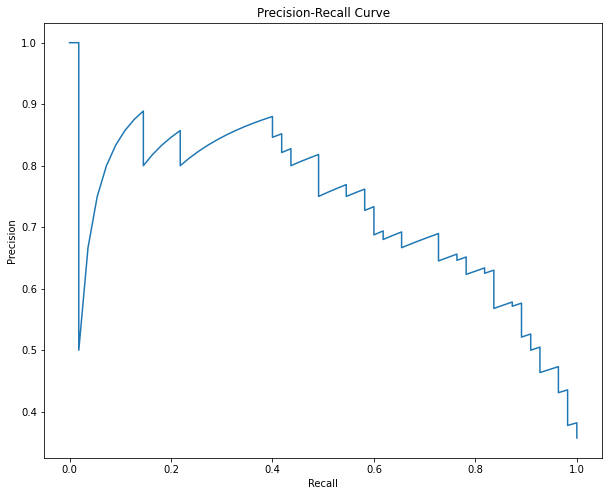

In [48]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import precision_recall_curve

# Create a Random Forest classifier with the best hyperparameters
rf_best = RandomForestClassifier(
    n_estimators=500,
    max_depth=5,
    min_samples_split=2,
    max_features=3,
)

rf_best.fit(X_train_resampled, y_train_resampled)
y_pred = rf_best.predict(X_test_scaled)

# Calculate accuracy score on the test data
rf_best_acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score on test data:", rf_best_acc_score)
print('\n')

print("Classification report:")
print(classification_report(y_test, y_pred))

print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')


# Calculate precision and recall values for different probability thresholds
precision, recall, thresholds = precision_recall_curve(y_test, rf_best.predict_proba(X_test_scaled)[:,1])

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [49]:
cross_val_score(rf_best, X_train_resampled, y_train_resampled, cv = 10).mean()

0.8043209876543209

## Tuning the Gradient Boosting

In [50]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

# Create an XGBoost classifier
xgb = XGBClassifier()

# Define the parameter grid for the XGBoost classifier
param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.1, 0.01, 0.001],
    'max_depth': [3, 5, 7]
}

# Create the grid search object
grid_search = GridSearchCV(xgb, param_grid=param_grid, cv=5)

# Fit the grid search to the data
grid_search.fit(X_train_resampled, y_train_resampled)

# Print the best parameters and best score
print("Best parameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

Best parameters:  {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 50}
Best score:  0.8305201863354037


In [51]:
xgb_tuned = GradientBoostingClassifier(**grid_search.best_params_).fit(X_train_resampled, y_train_resampled)
cross_val_score(xgb_tuned, X_train_resampled, y_train_resampled, cv = 10).mean()

0.8167283950617283

Accuracy score on test data: 0.7402597402597403


Classification report:
              precision    recall  f1-score   support

           0       0.84      0.74      0.78        99
           1       0.61      0.75      0.67        55

    accuracy                           0.74       154
   macro avg       0.73      0.74      0.73       154
weighted avg       0.76      0.74      0.74       154

Confusion matrix:
[[73 26]
 [14 41]]






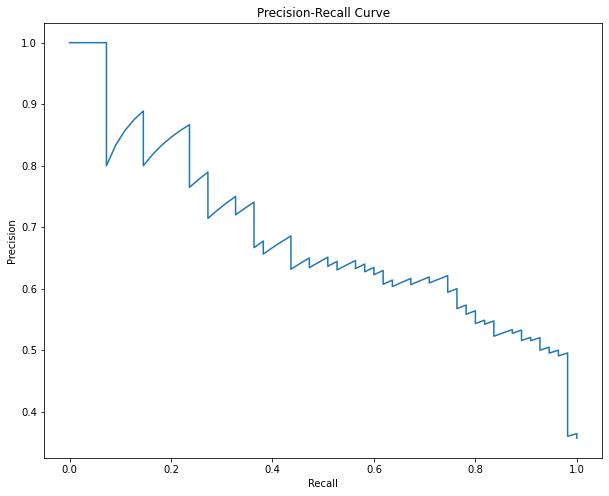

In [52]:
from sklearn.metrics import precision_recall_curve

xgb_tuned = GradientBoostingClassifier(**grid_search.best_params_)
xgb_tuned.fit(X_train_resampled, y_train_resampled)

y_pred = xgb_tuned.predict(X_test_scaled)

# Calculate accuracy score on the test data
acc_score = accuracy_score(y_test, y_pred)
print("Accuracy score on test data:", acc_score)
print('\n')

# Print classification report
print("Classification report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))
print('\n')
print('\n')


precision, recall, thresholds = precision_recall_curve(y_test, xgb_tuned.predict_proba(X_test_scaled)[:,1])

# Plot the precision-recall curve
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [53]:
from xgboost import XGBClassifier
xgb1 = XGBClassifier(learning_rate = 0.01, n_estimators = 25, max_depth = 2)
xgb1.fit(X_train_resampled,y_train_resampled)

y_pred_x = xgb1.predict(X_test_scaled)
xgb1_acc = accuracy_score(y_test, y_pred_x)
print(f'XGB classifier accuracy = {xgb1_acc:.4f}')

XGB classifier accuracy = 0.7597


In [56]:
from sklearn.neighbors import KNeighborsClassifier
Knn1 = KNeighborsClassifier(n_neighbors=40)

Knn1.fit(X_train_resampled, y_train_resampled)
    
    # Make predictions on the training and testing sets
y_test_pred = Knn1.predict(X_test_scaled)
test_accuracy = accuracy_score(y_test, y_test_pred)

print('Testing Accuracy of KNN: ',test_accuracy)

Testing Accuracy of KNN:  0.7272727272727273


In [59]:
with open('model1_db.sav', 'wb') as f:
    pickle.dump(xgb1, f)

In [57]:
filename2 = 'model2_db.sav'
filename3 = 'model3_db.sav'

pickle.dump(rf_best, open(filename2, 'wb'))
pickle.dump(Knn1, open(filename3, 'wb'))

In [58]:
# Save the scaler object to a file
with open('scaler_db.pkl', 'wb') as f:
    pickle.dump(scaler, f)